In [1]:
#importing tenserflow to create the neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE,RandomOverSampler 

In [2]:
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')
train, test = train_test_split(data, test_size=0.2)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

ros = RandomOverSampler(random_state=42)
X_train_r, y_train_r = ros.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train_s))


In [3]:
#model_2 -> second version of model & data was fidded with no sampling techniques
# _s the model is fidded data that was oversampled using smote
# _r model is fidded with data that was randomly over sampled
# _h model is fidded with oversampled data but the layers activation are diffrent
model_2 = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_2_s = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
) 
model_2_r = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_2_h = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="relu")
    ]
) 

model_2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_2_s.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_2_r.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_2_h.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)

In [4]:
#fiting the first NN
hist = model_2.fit(x_train,y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
228/228 [==============================] - 2s 3ms/step - loss: 0.4141 - accuracy: 0.8768 - val_loss: 0.3630 - val_accuracy: 0.8837
Epoch 2/50
228/228 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8819 - val_loss: 0.3593 - val_accuracy: 0.8837
Epoch 3/50
228/228 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8819 - val_loss: 0.3581 - val_accuracy: 0.8837
Epoch 4/50
228/228 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.8819 - val_loss: 0.3577 - val_accuracy: 0.8837
Epoch 5/50
228/228 [==============================] - 1s 3ms/step - loss: 0.3627 - accuracy: 0.8819 - val_loss: 0.3576 - val_accuracy: 0.8837
Epoch 6/50
228/228 [==============================] - 1s 3ms/step - loss: 0.3622 - accuracy: 0.8819 - val_loss: 0.3574 - val_accuracy: 0.8837
Epoch 7/50
228/228 [==============================] - 1s 3ms/step - loss: 0.3618 - accuracy: 0.8819 - val_loss: 0.3596 - val_accuracy: 0.8837
Epoch 

[]

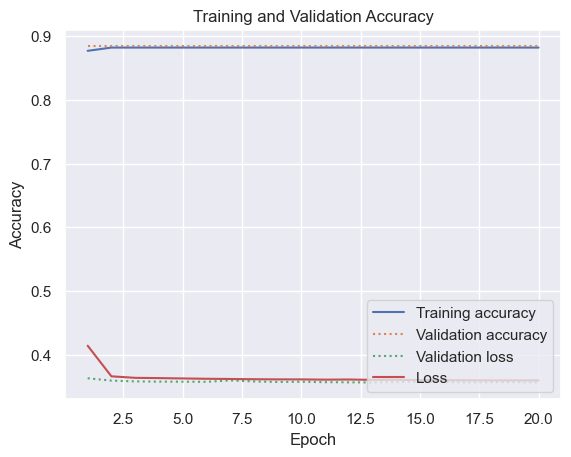

In [5]:
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
loss = hist.history['loss']
loss_val = hist.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

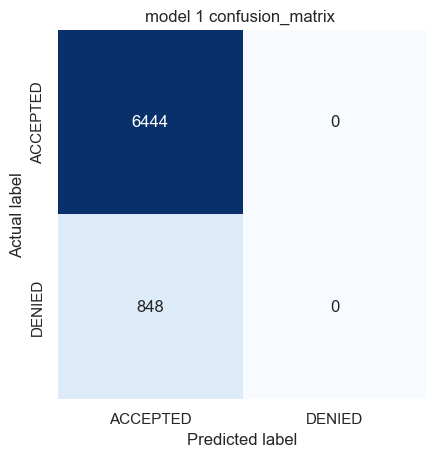

In [6]:
y_predicted = model_2.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [7]:
hist_s = model_2_s.fit(x_train_s,y_train_s, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 4s 5ms/step - loss: 0.6924 - accuracy: 0.5133 - val_loss: 0.6936 - val_accuracy: 0.3651
Epoch 2/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.5304 - val_loss: 0.6888 - val_accuracy: 0.4331
Epoch 3/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6870 - accuracy: 0.5430 - val_loss: 0.6752 - val_accuracy: 0.4860
Epoch 4/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6848 - accuracy: 0.5474 - val_loss: 0.6852 - val_accuracy: 0.4707
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6826 - accuracy: 0.5509 - val_loss: 0.6876 - val_accuracy: 0.4504
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6809 - accuracy: 0.5580 - val_loss: 0.6922 - val_accuracy: 0.4471
Epoch 7/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6792 - accuracy: 0.5599 - val_loss: 0.6723 - val_accuracy: 0.4967

[]

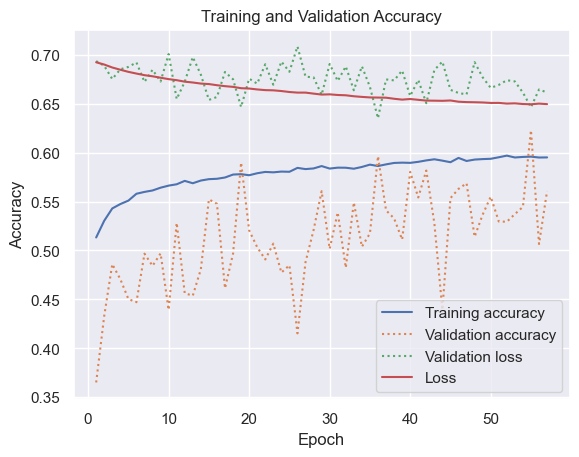

In [8]:
sns.set()
 
acc = hist_s.history['accuracy']
val = hist_s.history['val_accuracy']
loss = hist_s.history['loss']
loss_val = hist_s.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

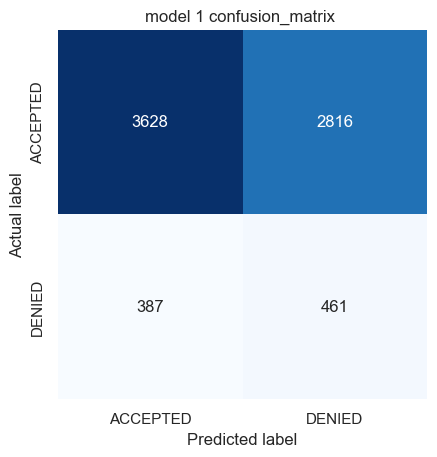

In [9]:
y_predicted = model_2_s.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [10]:
hist_r = model_2_r.fit(X_train_r,y_train_r, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 3s 3ms/step - loss: 0.6920 - accuracy: 0.5192 - val_loss: 0.6783 - val_accuracy: 0.5214
Epoch 2/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5346 - val_loss: 0.6973 - val_accuracy: 0.4955
Epoch 3/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.5427 - val_loss: 0.6676 - val_accuracy: 0.5979
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6853 - accuracy: 0.5492 - val_loss: 0.6984 - val_accuracy: 0.5307
Epoch 5/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.5542 - val_loss: 0.6761 - val_accuracy: 0.6201
Epoch 6/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6820 - accuracy: 0.5574 - val_loss: 0.6974 - val_accuracy: 0.5591
Epoch 7/100
402/402 [==============================] - 1s 3ms/step - loss: 0.6811 - accuracy: 0.5604 - val_loss: 0.6730 - val_accuracy: 0.6231

[]

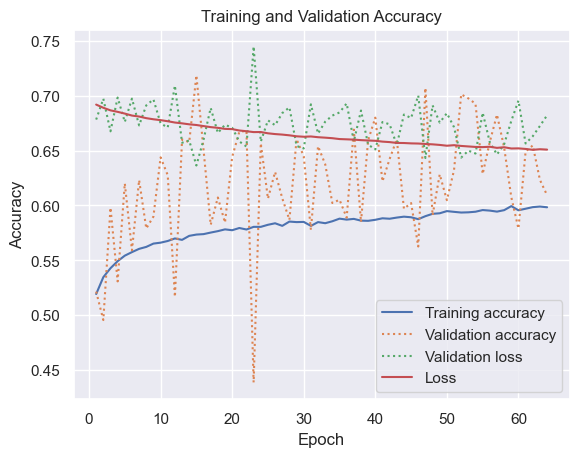

In [11]:
sns.set()
 
acc = hist_r.history['accuracy']
val = hist_r.history['val_accuracy']
loss = hist_r.history['loss']
loss_val = hist_r.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

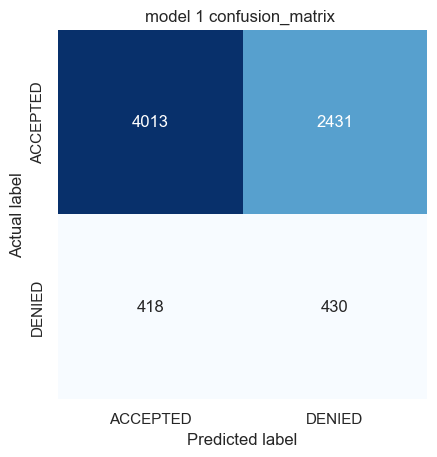

In [12]:
y_predicted = model_2_r.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [13]:
hist_h = model_2_h.fit(X_train_r,y_train_r, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 3s 3ms/step - loss: 1.2536 - accuracy: 0.4920 - val_loss: 0.6910 - val_accuracy: 0.6012
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.7213 - accuracy: 0.4926 - val_loss: 0.6986 - val_accuracy: 0.5033
Epoch 3/100
402/402 [==============================] - 1s 2ms/step - loss: 0.7039 - accuracy: 0.4999 - val_loss: 0.6853 - val_accuracy: 0.5854
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.5085 - val_loss: 0.7083 - val_accuracy: 0.4022
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.5123 - val_loss: 0.6988 - val_accuracy: 0.4616
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5216 - val_loss: 0.7211 - val_accuracy: 0.3771
Epoch 7/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5286 - val_loss: 0.6766 - val_accuracy: 0.5565

[]

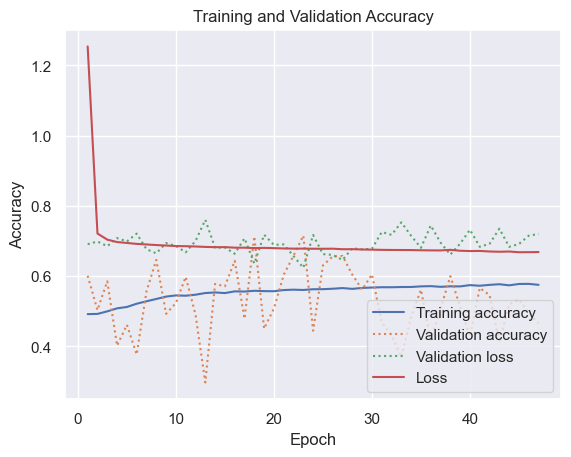

In [14]:
sns.set()
 
acc = hist_h.history['accuracy']
val = hist_h.history['val_accuracy']
loss = hist_h.history['loss']
loss_val = hist_h.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

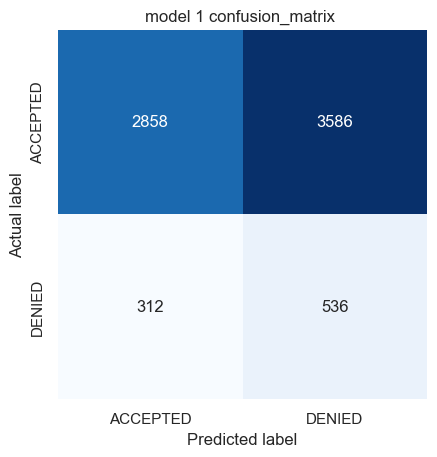

In [15]:
y_predicted = model_2_h.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Accuracy Score is 0.88371
      0  1
0  6444  0
1   848  0


Text(110.44999999999997, 0.5, 'Actual label')

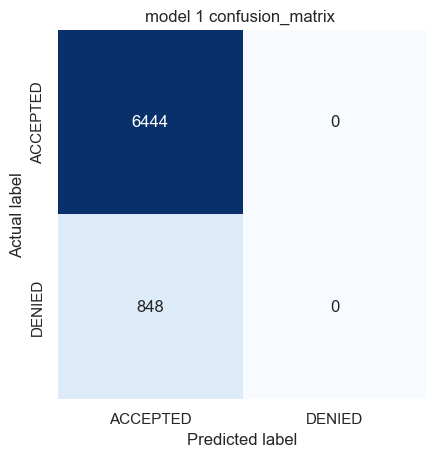

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_forest = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )

model_forest.fit(x_train, y_train)
y_predict = model_forest.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

y_predicted = model_forest.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Accuracy Score is 0.78689
      0     1
0  5413  1031
1   523   325


Text(110.44999999999997, 0.5, 'Actual label')

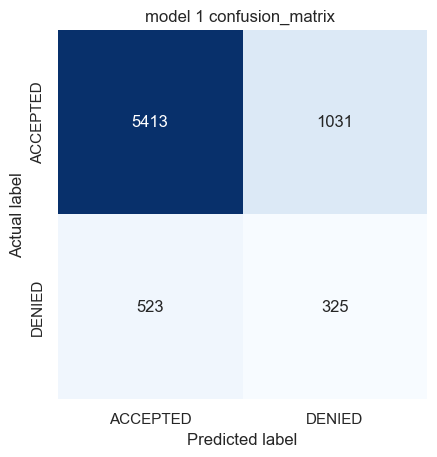

In [17]:
model_forest = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )

model_forest.fit(x_train_s, y_train_s)
y_predict = model_forest.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

y_predicted = model_forest.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')   

Accuracy Score is 0.76824
      0     1
0  5177  1267
1   423   425


Text(110.44999999999997, 0.5, 'Actual label')

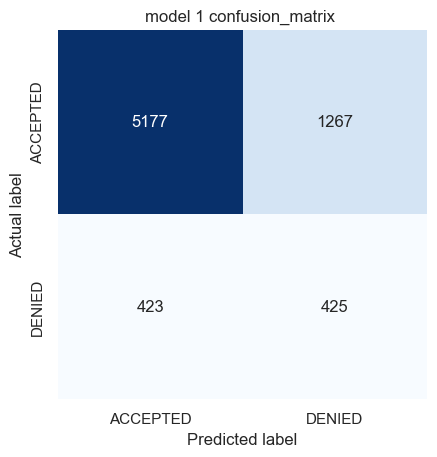

In [18]:
model_forest = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )

model_forest.fit(X_train_r, y_train_r)
y_predict = model_forest.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

y_predicted = model_forest.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')   